## Camera Calibration
The first step in analyzing camera images is to undistort the recorded image. Cameras look at a 3D object in the real world and translate that into 2D - this process changes what the shape and size of the 3D object appear to be.      


**Types of Distortion**

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called ***radial distortion***, and it’s the most common type of distortion.

Another type of distortion, is ***tangential distortion***. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.

In [1]:
import glob
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

### Display all calibration images in folder

20


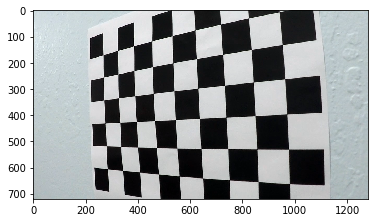

In [4]:
#num_files = len([name for name in os.listdir("./camera_cal/") if name.endswith('.jpg')])
calibration_images = glob.glob('./camera_cal/*.jpg')
print(len(calibration_images))
#create subplots based on num of files,loop thru files and show
for i, fname in enumerate(calibration_images):
    img=cv2.imread(fname)
    plt.imshow(img)
img=cv2.imread("./camera_cal/calibration4.jpg")
plt.imshow(img)

### Compute the camera calibration matrix and distortion coefficients given calibration images

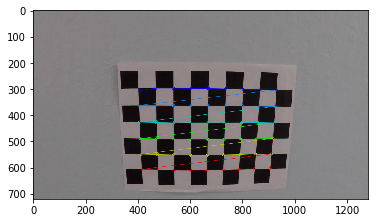

In [5]:
# number of inside corners
nx = 9
ny = 6

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space for an undistorted image
imgpoints = [] # 2d points in calibration image plane

# define x,y,z points for an undistorted 3D image from 
# top left: (0,0,0) to bottom right: (nx-1,ny-1,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)


# Step through the list and search for chessboard corners
for i,fname in enumerate(calibration_images):
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    #print(ret,corners)
    #print('---------------------\n')
    
    # if corners found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

### Apply distortion correction to a test image

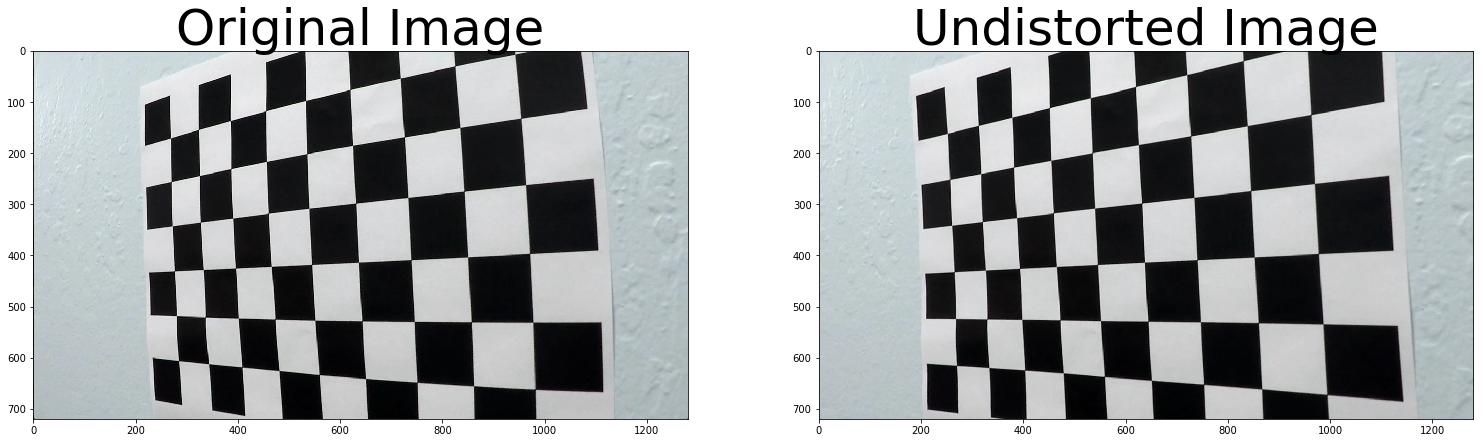

In [6]:
# Read in an image
img = cv2.imread('./camera_cal/calibration4.jpg')
img_size = (img.shape[1], img.shape[0])


def cal_undistort(img, objpoints, imgpoints):
    # Do camera calibration given object points and image points
    # mtx: camera matrix, dist: distortion coeffs
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return ret, mtx,dist,rvecs,tvecs,undist

ret,mtx,dist,rvecs,tvecs,undist = cal_undistort(img, objpoints, imgpoints)
cv2.imwrite('output_images/test_undist.jpg',undist)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle,open( "./wide_dist_pickle.p", "wb" ) )


# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)